**Genders Classification Using Data Augmentation Technique with CNN**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [143]:
train_data_dir='/content/drive/MyDrive/train'
valid_data_dir='/content/drive/MyDrive/Valid'
train_dataset=ImageDataGenerator(rescale=1.0/255,   #ormalization
                                 rotation_range=30,
                                 shear_range=0.2,
                                 horizontal_flip=True,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 fill_mode='nearest')
test_dataset=ImageDataGenerator(rescale=1.0/255)
batch_size=16

train_generator=train_dataset.flow_from_directory(
    train_data_dir,
    target_size=(150,150),
    color_mode='rgb',
     shuffle=True,         #shuffling data
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator=test_dataset.flow_from_directory(
    valid_data_dir,
    target_size=(150,150),
    color_mode='rgb',
    batch_size=batch_size,
    shuffle=False,
    class_mode='binary'
)

Found 2068 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,LeakyReLU,Flatten,Dropout

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),strides=(1,1),padding='same',input_shape=(150,150,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),strides=(1,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),strides=(1,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(128,activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu_52 (LeakyReLU)  (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_53 (LeakyReLU)  (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_generator,steps_per_epoch=2068/batch_size,epochs=10,validation_data=validation_generator,validation_steps=1045/batch_size)

Epoch 1/10
129/129 [==============================] - 19s 148ms/step - loss: 0.4527 - accuracy: 0.8008 - val_loss: 0.3241 - val_accuracy: 0.8756
Epoch 2/10
129/129 [==============================] - 18s 139ms/step - loss: 0.4580 - accuracy: 0.8013 - val_loss: 0.3632 - val_accuracy: 0.8440
Epoch 3/10
129/129 [==============================] - 18s 138ms/step - loss: 0.4481 - accuracy: 0.8046 - val_loss: 0.3175 - val_accuracy: 0.8746
Epoch 4/10
129/129 [==============================] - 19s 145ms/step - loss: 0.4362 - accuracy: 0.8017 - val_loss: 0.3088 - val_accuracy: 0.8900
Epoch 5/10
129/129 [==============================] - 18s 138ms/step - loss: 0.4184 - accuracy: 0.8269 - val_loss: 0.2905 - val_accuracy: 0.8861
Epoch 6/10
129/129 [==============================] - 19s 144ms/step - loss: 0.4031 - accuracy: 0.8288 - val_loss: 0.3059 - val_accuracy: 0.8727
Epoch 7/10
129/129 [==============================] - 19s 144ms/step - loss: 0.4075 - accuracy: 0.8245 - val_loss: 0.3312 - val_ac

**Model Evaluation**

In [ ]:
evaluation = model.evaluate(validation_generator, steps=1045 / batch_size)
loss = evaluation[0]
accuracy = evaluation[1]
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

65/65 [==============================] - 2s 31ms/step - loss: 0.2887 - accuracy: 0.8986
Validation Loss: 0.2887
Validation Accuracy: 0.8986


In [ ]:
true_labels=validation_generator.classes
probs=model.predict(validation_generator)
predicted_labels=np.round(probs)

66/66 [==============================] - 3s 49ms/step


**Classification Report**

In [149]:
from sklearn.metrics import classification_report
cr=classification_report(true_labels,predicted_labels)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       517
           1       0.90      0.90      0.90       528

    accuracy                           0.90      1045
   macro avg       0.90      0.90      0.90      1045
weighted avg       0.90      0.90      0.90      1045



**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(true_labels,predicted_labels)

<Axes: >

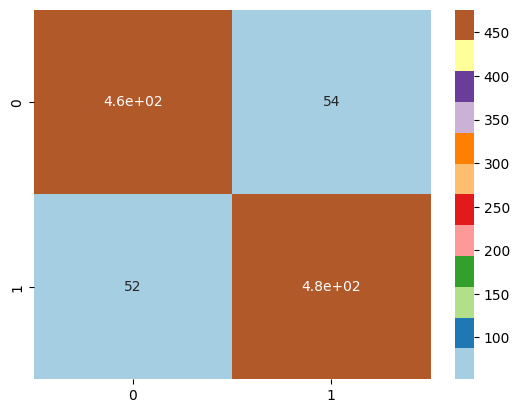

In [148]:
import seaborn as sns
sns.heatmap(cm,annot=True,cmap='Paired')

**Testing Our Model**

1/1 [==============================] - 0s 34ms/step


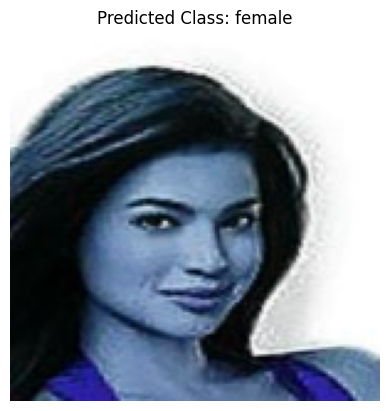

In [151]:
image_path = '/content/drive/MyDrive/test/female/160063.jpg'
img = cv2.imread(image_path)
resized_img = cv2.resize(img, (150, 150))
normalized_img = resized_img / 255.0
reshaped_img = normalized_img.reshape(1, 150, 150, 3)
prediction = model.predict(reshaped_img)
predicted_class = "female" if prediction >0.5 else "male"
plt.imshow(normalized_img)
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')
plt.show()

In [ ]:
model.save('genders_CNN_data.h5')